Churn prediction means detecting which customers are likely to cancel a subscription to a
service based on how they use the service. It is a critical prediction for many businesses because
acquiring new clients often costs more than retaining existing ones.

## Objective
build a model which would predict this user have exited or not.

In [241]:
import pandas as pd
import seaborn as sns
import numpy as np

In [242]:
missing = ['?|', 'z||o','missed','x?x','?']

In [243]:
df = pd.read_csv("Banking.csv",na_values =missing)
df.drop('RowNumber',axis = 1,inplace = True )

In [244]:
df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,NaN,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608.0,Spain,NaN,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502.0,France,NaN,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699.0,France,NaN,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850.0,Spain,NaN,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645.0,Spain,NaN,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822.0,France,NaN,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376.0,Germany,NaN,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501.0,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684.0,France,NaN,27,2,134603.88,1,1,1,71725.73,0


In [245]:
df.duplicated().sum()

0

In [246]:
df.isna().sum()

CustomerId          0
Surname             0
CreditScore        36
Geography          56
Gender             29
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

## preprocessing 

In [247]:
df['CreditScore']= pd.to_numeric(df['CreditScore'])

In [248]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True ,axis = 0)

In [249]:
df['Geography'].fillna(df['Geography'].mode()[0],inplace = True ,axis = 0)

In [250]:
df['CreditScore'].fillna(df['CreditScore'].mean(),inplace = True ,axis = 0)

In [251]:
df.drop('CustomerId',axis = 1 , inplace = True)

## Exploratory Data Analysis

In [252]:
Num_Col = df.select_dtypes(include="number")
Cat_Col = df.select_dtypes(include="object_")

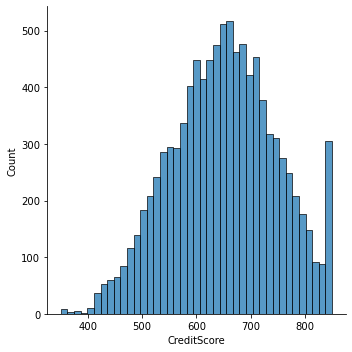

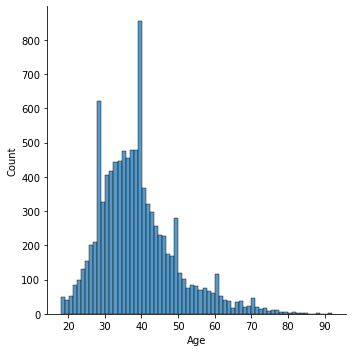

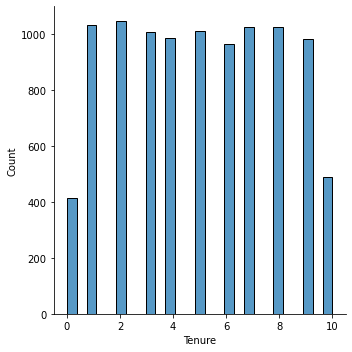

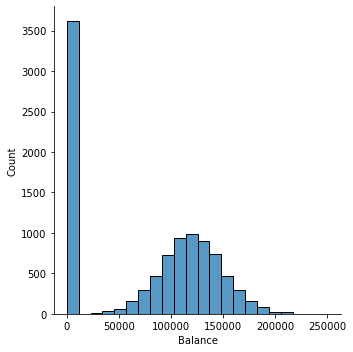

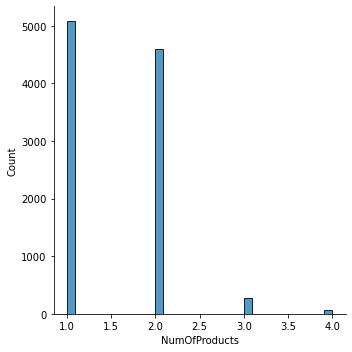

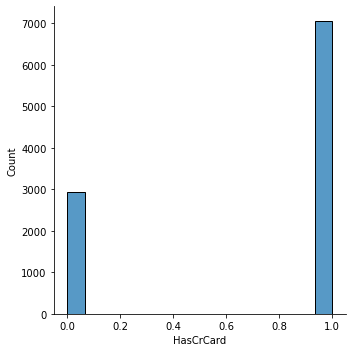

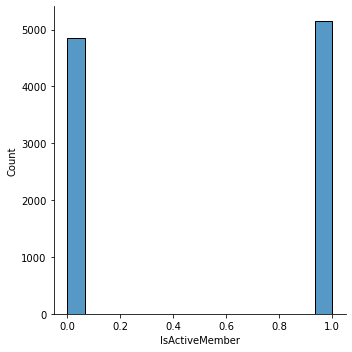

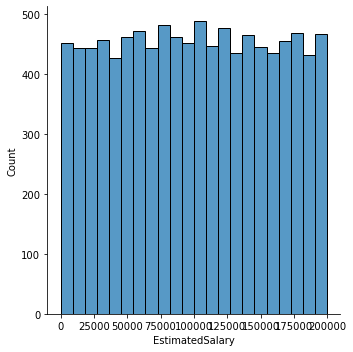

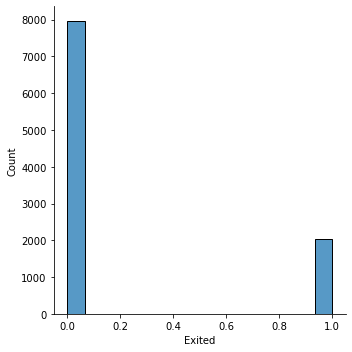

In [253]:
for i in Num_Col :
    sns.displot(data = df , x = i)

<AxesSubplot:xlabel='CreditScore'>

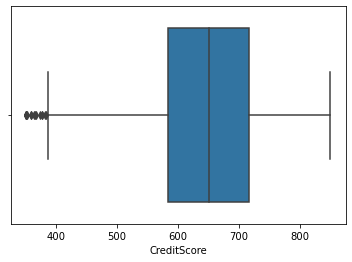

In [254]:
sns.boxplot(data =df , x ='CreditScore' ) 

In [255]:
from datasist.structdata import  detect_outliers

In [256]:
df.drop(detect_outliers (df,0,['CreditScore']),inplace = True , axis = 0)

 ## machin learning

In [257]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from category_encoders import BinaryEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB

## Encoding

In [258]:
encoder = ColumnTransformer(transformers=[('enc',OneHotEncoder(sparse=False,drop='first'),
['Gender','Geography']),('enc1',BinaryEncoder(),['Surname'])],remainder='passthrough')

In [259]:
encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('enc',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender', 'Geography']),
                                ('enc1', BinaryEncoder(), ['Surname'])])

In [260]:
df['Exited'].value_counts()

0    7963
1    2021
Name: Exited, dtype: int64

1 refer to Yes 
0 refer to No

In [261]:
x = df.drop('Exited',axis =1)
y= df['Exited']

## Using DecisionTree

In [262]:
train_score = []
test_score = []

In [263]:
for i in range(1,20,3):
    list1 =[]
    list1.append(('encoder',encoder))
    list1.append(('scaler',StandardScaler()))
    list1.append(('model',DecisionTreeClassifier( max_depth = i , min_samples_split = 10,min_samples_leaf = 10 )))
    pipline= Pipeline(steps=list1) 
    scores = cross_validate(pipline,x,y,cv= 5,scoring='accuracy', return_train_score=True, return_estimator=True)
    tr= scores['train_score'].mean()
    ts= scores['test_score'].mean()
    train_score.append(tr)
    test_score.append(ts)

<AxesSubplot:>

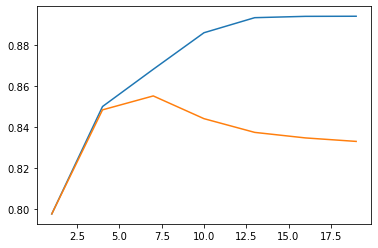

In [264]:
sns.lineplot(y=f,x= range(1,20,3))
sns.lineplot(y=g,x= range(1,20,3))

ideal max_depth is 5

In [265]:
list1 =[]
list1.append(('encoder',encoder))
list1.append(('scaler',StandardScaler()))
list1.append(('model',DecisionTreeClassifier(max_depth = 5 , min_samples_split = 10,min_samples_leaf = 10 )))

In [266]:
pipline= Pipeline(steps=list1) 

In [267]:
scores = cross_validate(pipline,x,y,cv= 5,scoring='accuracy', return_train_score=True)

In [268]:
scores['train_score'].mean()

0.8588240912765166

In [269]:
scores['test_score'].mean()

0.8530641152108925

In [270]:
pipline.fit(x,y)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender', 'Geography']),
                                                 ('enc1', BinaryEncoder(),
                                                  ['Surname'])])),
                ('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        min_samples_split=10))])

In [271]:
pipline.feature_names_in_

array(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'], dtype=object)

## According to these features above  is this user Exited ???

Ahmed , 700 , France , Male , 30 , 7 , 20000 , 2 , 0 , 0 , 50000 

In [272]:
user = ['Ahmed',700, 'France','Male',30,7,20000,2,0,0,50000]

In [273]:
pipline.predict(pd.DataFrame([user] , columns=pipline.feature_names_in_))

array([0], dtype=int64)

oops  !!!
Not Exist 